In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
# Load the dataset
data = pd.read_csv('D:/sales_marketing/notebooks/data/Train.csv')

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Data preprocessing
# Handle missing values
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)


In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
import pandas as pd
from datetime import datetime

# Assuming data is your DataFrame with the given dataset
# Convert "Outlet_Establishment_Year" to datetime
data['Outlet_Establishment_Year'] = pd.to_datetime(data['Outlet_Establishment_Year'], format='%Y')

# Extract the year from the datetime column
current_year = datetime.now().year
data['Outlet_Years'] = current_year - data['Outlet_Establishment_Year'].dt.year

# Drop the original "Outlet_Establishment_Year" column if needed
data.drop('Outlet_Establishment_Year', axis=1, inplace=True)

# Display the updated DataFrame
print(data)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier Outlet_Size  \
0                     Dairy  249.8092            OUT049      Medium   
1    

In [7]:
data.to_csv('updated_dataset.csv', index=False)

In [8]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,37


In [9]:
# Feature selection
X = data.drop(['Item_Identifier',  'Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']

In [10]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,25
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,15
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,25
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,26
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,37
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,37
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,22
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,20
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,15


In [11]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [12]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,y_train.shape, y_test.shape


((6818, 10), (1705, 10), (6818,), (1705,))

In [14]:
# Create Column Transformer with 2 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [15]:
X_train_scaled = preprocessor.fit_transform(X_train)

In [18]:
X_train_scaled

<6818x45 sparse matrix of type '<class 'numpy.float64'>'
	with 68180 stored elements in Compressed Sparse Row format>

In [21]:
X_train_scaled_dense = X_train_scaled.toarray()
print(X_train_scaled_dense)

[[ 0.          0.          1.         ... -0.60070308  0.47070929
  -0.13616916]
 [ 0.          1.          0.         ... -0.36215854  0.45787656
  -0.49352147]
 [ 0.          0.          1.         ...  0.19493285 -0.48262534
   0.10206572]
 ...
 [ 0.          1.          0.         ... -0.91693149  1.52620691
  -0.49352147]
 [ 0.          0.          0.         ... -0.22818684 -0.38307175
  -1.08910867]
 [ 1.          0.          0.         ... -0.95485942 -0.73811593
   0.10206572]]


In [19]:
X_test_scaled= preprocessor.transform(X_test)

In [22]:
X_test_scaled_dense = X_test_scaled.toarray()
print(X_test_scaled_dense)

[[ 0.          1.          0.         ... -0.77388703 -0.99890847
   1.29324011]
 [ 0.          1.          0.         ...  0.09797779 -1.58604822
   0.10206572]
 [ 0.          0.          1.         ... -0.48194218 -1.59665209
  -0.13616916]
 ...
 [ 0.          0.          1.         ... -0.48385674 -1.59665209
   1.29324011]
 [ 0.          0.          1.         ...  1.46010317 -1.46145914
  -1.32734355]
 [ 0.          1.          0.         ... -0.21387994 -0.52251456
  -0.49352147]]


In [23]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [24]:

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, 
                                                      criterion='squared_error', 
                                                      max_depth=5, min_samples_split=5,
                                                        min_samples_leaf=3, 
                                                        min_weight_fraction_leaf=0.0, 
                                                        max_features=1.0, 
                                                        max_leaf_nodes=None, 
                                                        oob_score=False, 
                                                        n_jobs=None, 
                                                        random_state=None),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled_dense, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled_dense)
    y_test_pred = model.predict(X_test_scaled_dense)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')  
    


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1142.5462
- Mean Absolute Error: 849.3926
- R2 Score: 0.5587
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1068.2868
- Mean Absolute Error: 792.3726
- R2 Score: 0.5801


Lasso
Model performance for Training set
- Root Mean Squared Error: 1141.6438
- Mean Absolute Error: 846.8761
- R2 Score: 0.5594
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1068.6585
- Mean Absolute Error: 791.2973
- R2 Score: 0.5798


Ridge
Model performance for Training set
- Root Mean Squared Error: 1141.3924
- Mean Absolute Error: 847.2364
- R2 Score: 0.5596
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1069.5028
- Mean Absolute Error: 792.0017
- R2 Score: 0.5792


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 997.5678
- Mean Absolute Error: 716.0433
- R2 Sco

In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.618067
7,CatBoosting Regressor,0.589348
0,Linear Regression,0.580114
1,Lasso,0.579822
2,Ridge,0.579158
6,XGBRegressor,0.543183
3,K-Neighbors Regressor,0.497589
8,AdaBoost Regressor,0.425895
4,Decision Tree,0.159095


Text(0, 0.5, 'Predicted')

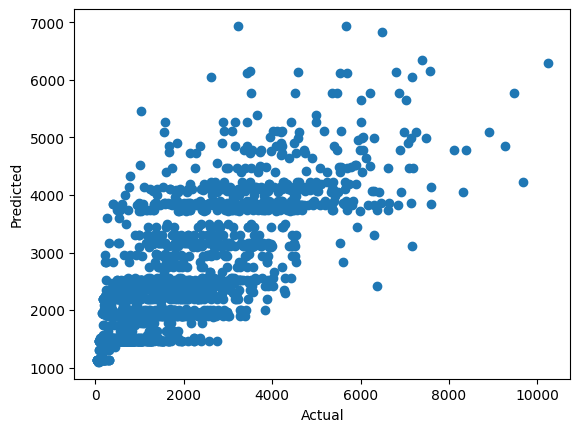

In [26]:
plt.scatter(y_test,y_test_pred )
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='Item_Outlet_Sales'>

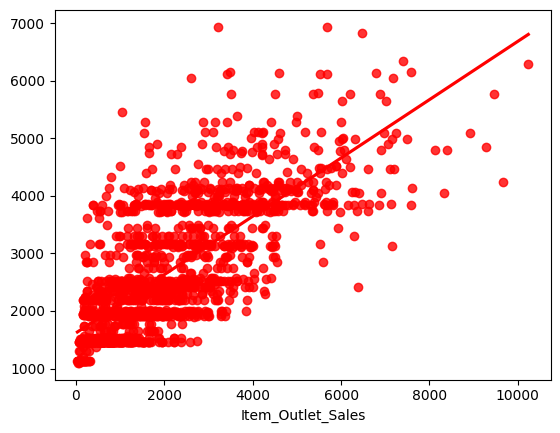

In [27]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red')

In [28]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred})
pred_df

,Actual Value,Predicted Value,Difference
7503,1743.0644,1645.077722,97.986678
2957,356.8688,1457.040588,-1100.171788
7031,377.5086,1458.498203,-1080.989603
1084,5778.4782,4479.985508,1298.492692
856,2356.9320,3833.609398,-1476.677398
...,...,...,...
7205,3004.0896,2415.192953,588.896647
3257,890.8404,2346.917688,-1456.077288
6346,629.1810,1458.498203,-829.317203
6318,253.0040,1512.143408,-1259.139408
